# Dataset Overview
There are 16 features used to describe each user in the dataset:

- **id**: user id
- **date_account_created:** the date of account creation
- **timestamp_first_active:** timestamp of the first activity, note that it can be earlier than
- **date_first_booking:** date of first booking
- **gender**
- **age**
- **signup_method**
- **signup_flow:** the page a user came to signup up from
- **language:** international language preference
- **affiliate_channle:** what kind of paid marketing
- **affiliate_provider:** where the marketing is e.g. google, craigslist, other
- **first_affiliate_tracked:** whats the first marketing the user interacted with before the signing up
- **signup_app**
- **first_device_type**
- **first_browser**
- **country_destination**: the country that the user was going when first booking

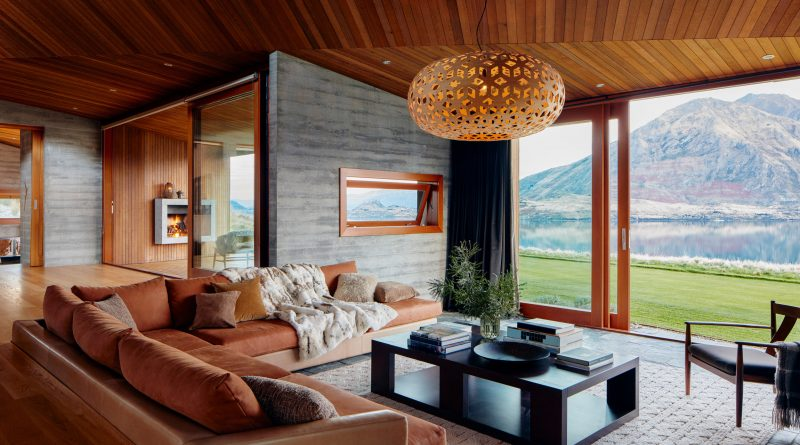

In [299]:
from IPython.display import Image 

Image('/kaggle/input/images/Airbnb-Luxe-800x445.jpg')

# Importing the important libraries

In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the Dataset

In [244]:
df = pd.read_csv('/kaggle/input/airbnb/airbnb.csv')

In [245]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [246]:
df.shape

(213451, 16)

# Data Preparation

## Check the validity of the columns of this dataset

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

- I noticed that the **"date_account_created"**, **"timestamp_first_active"**,and **"date_first_booking"** columns in the dataset appear to have the wrong format type.
- In addation, that the **"age"** columns should be intger not float. But I will handle it after handling the nulls in this columns

To ensure the data is accurate and consistent, I suggest changing the format type of both columns to "datetime". This will allow for better analysis and interpretation of the data.

In [248]:
df['date_account_created'] = pd.to_datetime(df['date_account_created']
                                            .astype(str), format='%Y-%m-%d')
df['date_first_booking'] = pd.to_datetime(df['date_first_booking']
                                          .astype(str), format='%Y-%m-%d', errors='coerce')
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active']
                                              .astype(str), format='%Y%m%d%H%M%S')

df['age'] = df['age'].fillna(-1).astype('Int64')
df['age'] = df['age'].replace(-1, np.nan)

# Check the Missing Data.

In [249]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,<NA>,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,-unknown-,<NA>,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,-unknown-,32,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,-unknown-,<NA>,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [250]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date_first_booking,124543,58.347349
age,87990,41.222576
first_affiliate_tracked,6065,2.841402
id,0,0.000000
date_account_created,0,0.000000
timestamp_first_active,0,0.000000
gender,0,0.000000
signup_method,0,0.000000
signup_flow,0,0.000000
language,0,0.000000


<AxesSubplot:>

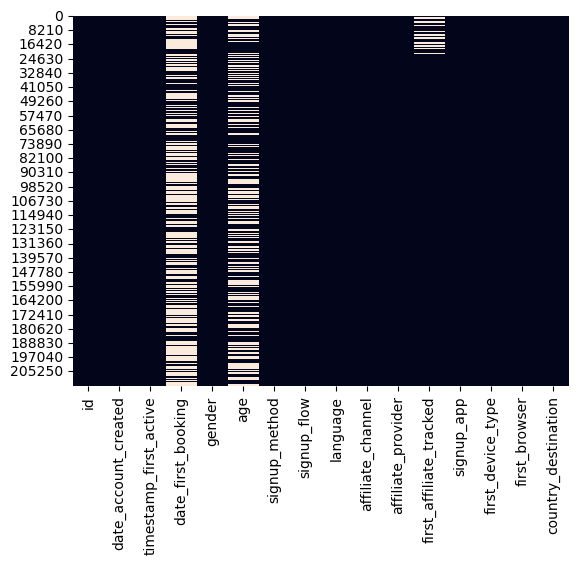

In [251]:
sns.heatmap(df.isnull(),cbar=False)

In [252]:
# check for the data_account_created and the timestamp_first_active, it looks like that the users create the account in its first activation time.
df[df['first_affiliate_tracked'].isna()].head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
12,k6np330cm1,2010-01-05,2010-01-05 06:08:59,2010-01-18,-unknown-,<NA>,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR
16,2dwbwkx056,2010-01-07,2010-01-07 21:51:25,NaT,-unknown-,<NA>,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
17,frhre329au,2010-01-07,2010-01-07 22:46:25,2010-01-09,-unknown-,31,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US
18,cxlg85pg1r,2010-01-08,2010-01-08 01:56:41,NaT,-unknown-,<NA>,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF
20,qdubonn3uk,2010-01-10,2010-01-10 15:21:20,2010-01-18,-unknown-,<NA>,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US


- Upon reviewing the data, it appears that the **"first_affiliate_tracked"** column may follow the **Univariate Missing Data Pattern**. This suggests that users with missing data in this column may not have been tracked previously. And it consider to be **Missing Not At Random**

- I think there is no such an pattern in the other two columns **"age"** and **"date_first_booking"**. **Random**
- the missing values in the **"date_first_booking"** colum means that the user didn't book at that time.

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,125461.0,49.668335,155.666612,1.0,28.0,34.0,43.0,2014.0
signup_flow,213451.0,3.267387,7.637707,0.0,0.0,0.0,0.0,25.0


In [254]:
df.describe(include='object')

,id,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,213451,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,4,3,25,8,18,7,4,9,52,12
top,gxn3p5htnn,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,95688,152897,206314,137727,137426,109232,182717,89600,63845,124543


- According to available statistics, the oldest living human being at the time of recording in 2015 was 105 years old. Therefore, any reported age greater than 108 years old may be considered an erroneous value rather than an outlier, and we will take measures to remove such entries from our dataset

- Upon careful examination of the data set, it appears that the values ranging from 1924 to 2014 may represent erroneous entries for year of birth. As such, we will take immediate steps to correct this information. Furthermore, we have identified individuals who have indicated an age below 10 years old, which seems improbable for users of the Airbnb platform. We will investigate this matter further and take appropriate action to address any inconsistencies.

[List_of_oldest_living_people](https://en.wikipedia.org/wiki/List_of_oldest_living_people)

In [255]:
df[df['age'] > 108].age.value_counts().sort_index()

109      31
110     196
111       2
112       1
113       4
115      13
132       1
150       1
1924      2
1925      1
1926      1
1927      1
1928      2
1929      2
1931      3
1932      3
1933      1
1935      1
1936      2
1938      1
1942      1
1947      2
1949      3
1952      1
1953      1
1995      1
2008      1
2013     39
2014    710
Name: age, dtype: Int64

In [256]:
df[df['age'] < 15].age.value_counts().sort_index()

1     2
2     7
4     3
5    45
Name: age, dtype: Int64

In [257]:
def calculate_age(df): 
    # subtract the age from 2015 if it's greater than 1900
    df.loc[df['age'] > 1900, 'age'] = 2015 - df.loc[df['age'] > 1900, 'age']
    # drop any age value greater than 108, but exclude null values
    df = df.loc[(df['age'] <= 105) | (df['age'].isnull()), :]
    
    # drop any age value less than 15, but exclude null values
    df = df.loc[(df['age'] >= 15) | (df['age'].isnull()), :]
    return df

In [258]:
df = calculate_age(df)

# Check The distributions of the age

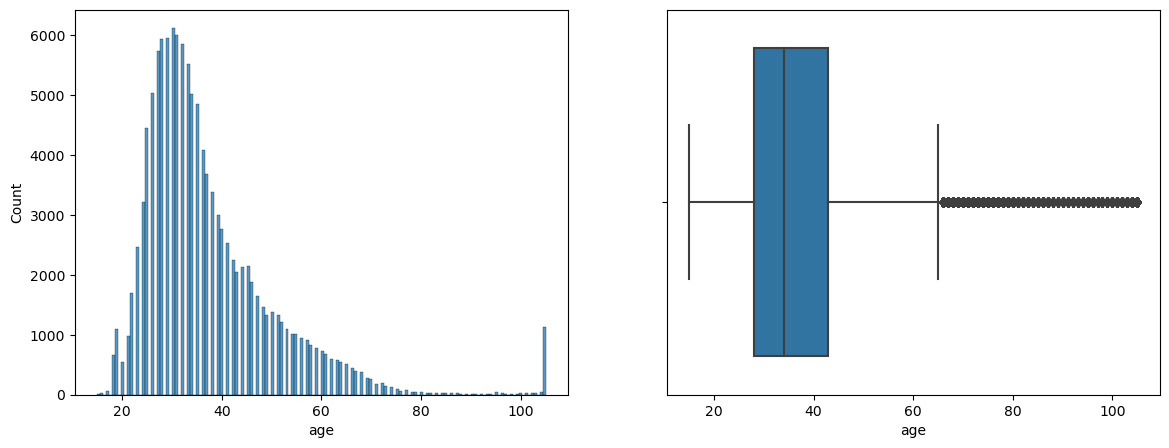

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.histplot(ax=axes[0], data=df, x="age")
sns.boxplot(ax=axes[1], data=df, x="age")

plt.show()

In [242]:
q1, q3 = np.percentile(df.age.dropna(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df.age[(df.age < lower_bound) | (df.age > upper_bound)]
print("Number of Outliers", len(outliers))
print('Lower: ',q1,'\nUpper: ',q3)

Number of Outliers 35748
Lower:  32.0 
Upper:  37.26096501809409


 #### Observations : 
 - 1 . Majority of the users are between age 28 and 43 years . 
 - 2 . There are some age values which are less than 18 years .

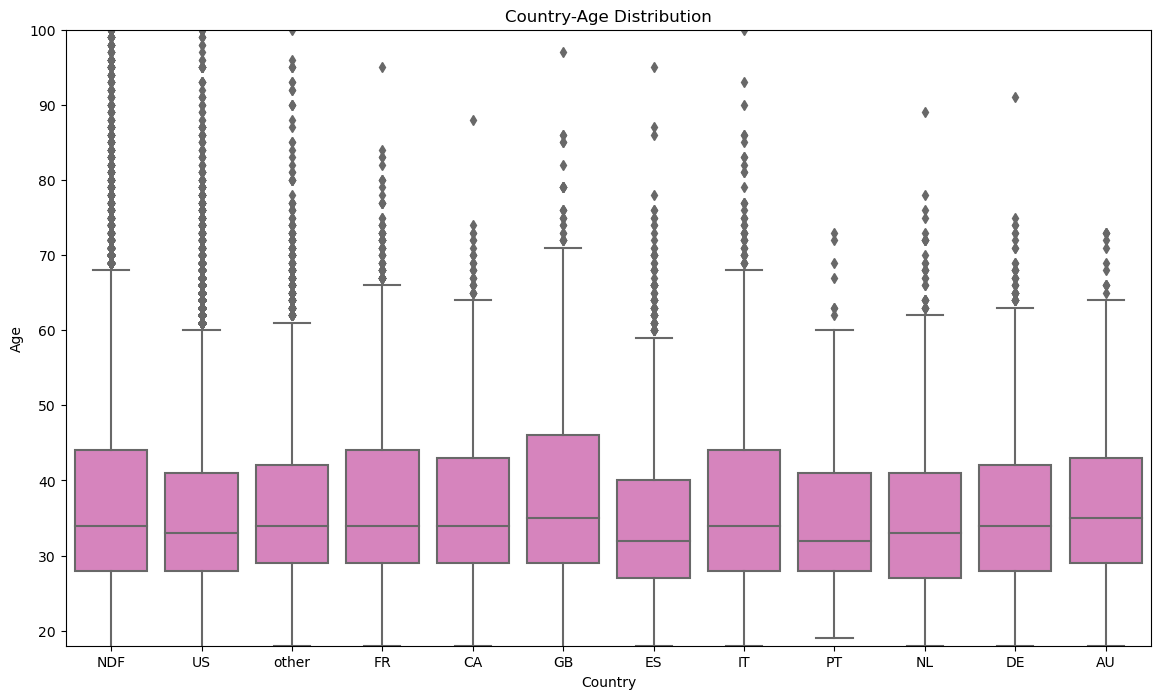

In [260]:
#Destination-Age distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=df,y='age',x='country_destination',color=sns.color_palette()[6]);
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

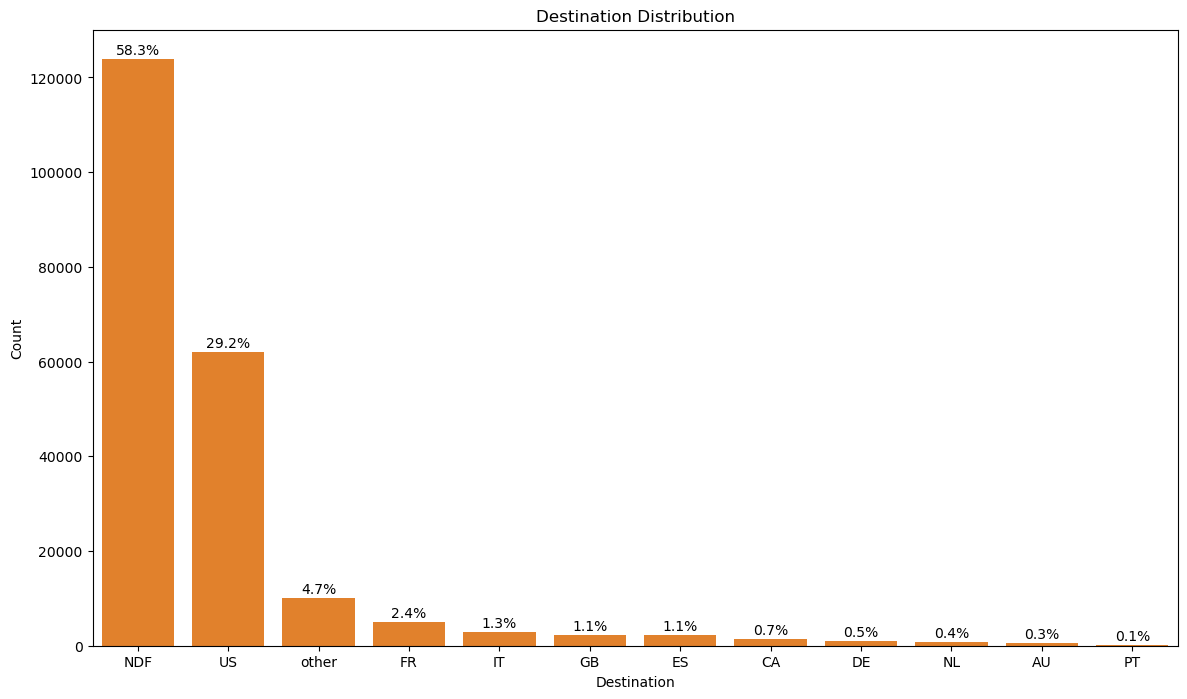

In [263]:
#Finding Destination Distribution.

plt.figure(figsize=(14,8))
order1 = df['country_destination'].value_counts().index
sns.countplot(data = df, x = 'country_destination', order = order1, color = sns.color_palette()[1])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = df['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df.shape[0])
    plt.text(i,count+1000,strt,ha='center')

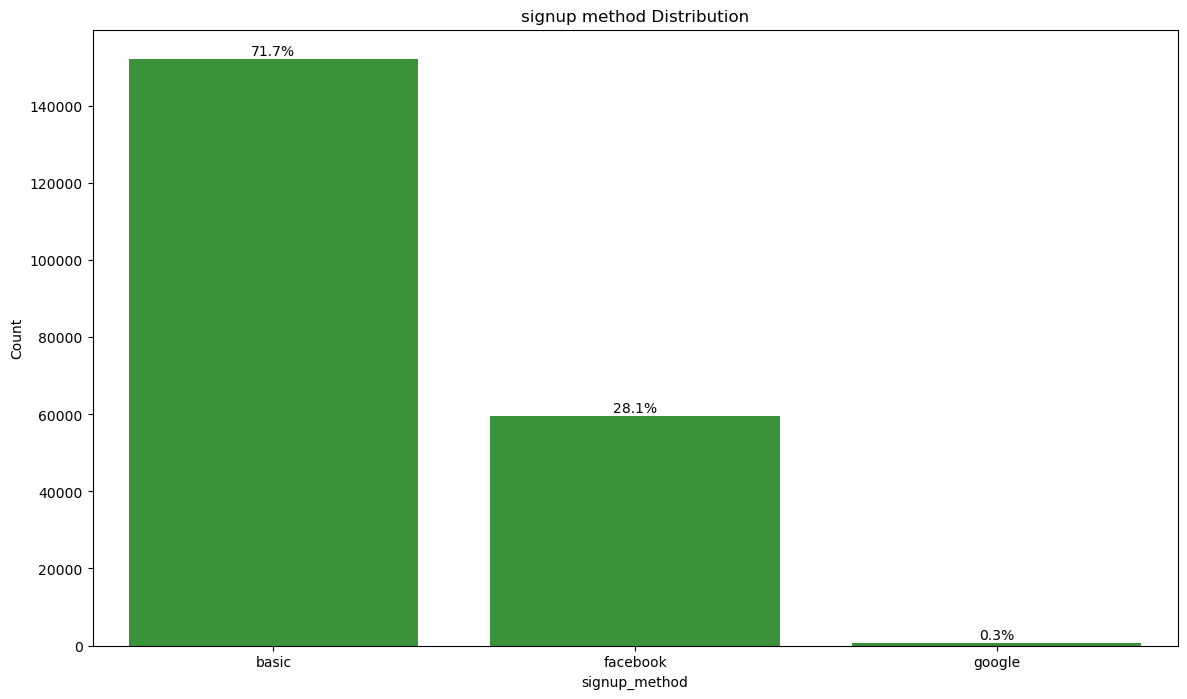

In [287]:
#Finding signup method Distribution.

plt.figure(figsize=(14,8))
order1 = df['signup_method'].value_counts().index
sns.countplot(data = df, x = 'signup_method', order = order1, color = sns.color_palette()[2])
plt.xlabel('signup_method')
plt.ylabel('Count')
plt.title('signup method Distribution')
order2 = df['signup_method'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df.shape[0])
    plt.text(i,count+1000,strt,ha='center')

- Based on our analysis, it appears that a significant number of our users prefer to sign up using either Facebook or a basic account, while the adoption of Google account registration remains comparatively low, with only 0.3% of users utilizing this feature.

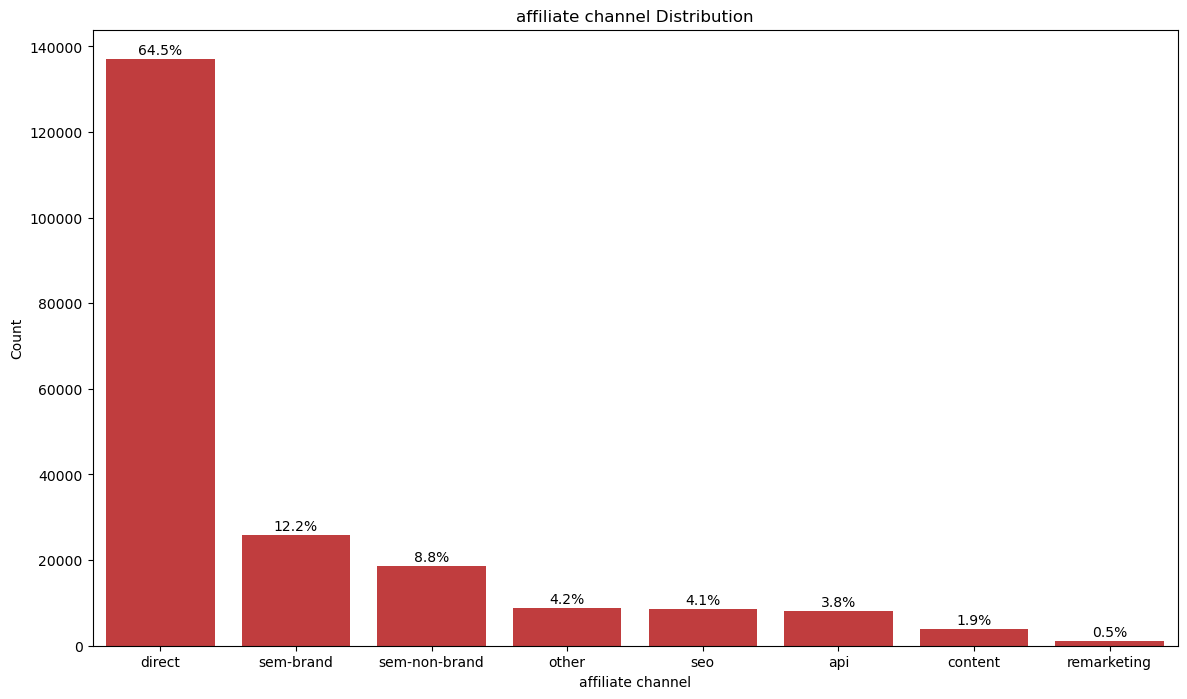

In [292]:
#Finding affiliate channel Distribution.

plt.figure(figsize=(14,8))
order1 = df['affiliate_channel'].value_counts().index
sns.countplot(data = df, x = 'affiliate_channel', order = order1, color = sns.color_palette()[3])
plt.xlabel('affiliate channel')
plt.ylabel('Count')
plt.title('affiliate channel Distribution')
order2 = df['affiliate_channel'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df.shape[0])
    plt.text(i,count+1000,strt,ha='center')

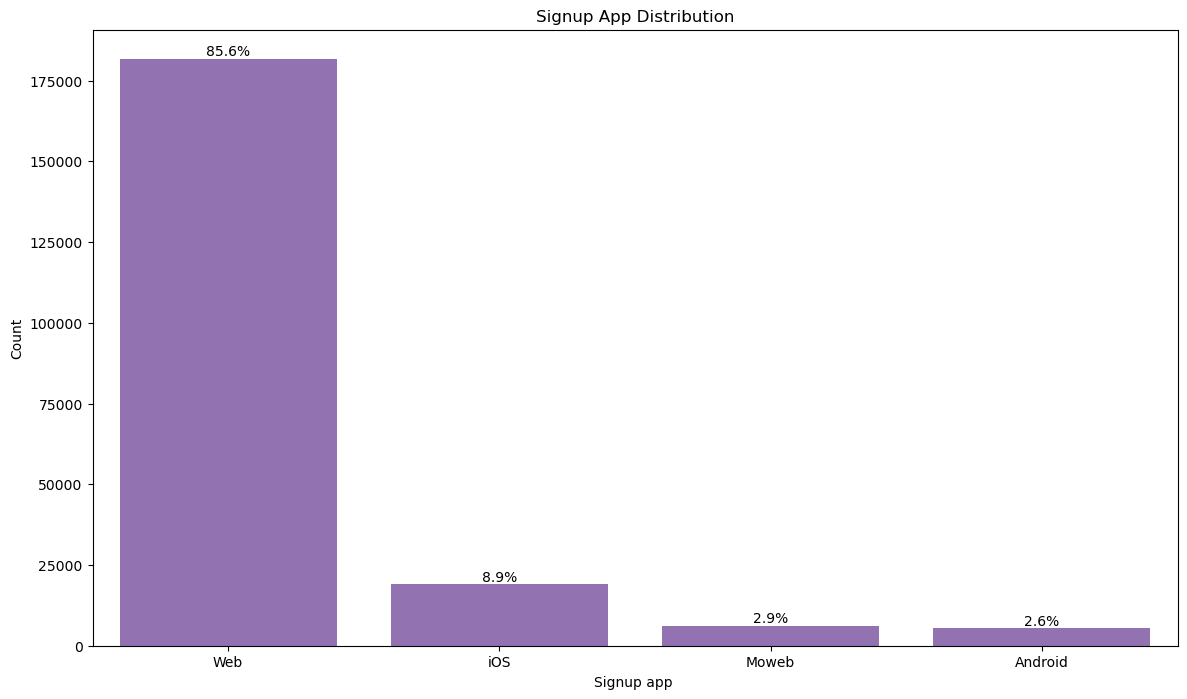

In [294]:
#Finding affiliate channel Distribution.

plt.figure(figsize=(14,8))
order1 = df['signup_app'].value_counts().index
sns.countplot(data = df, x = 'signup_app', order = order1, color = sns.color_palette()[4])
plt.xlabel('Signup app ')
plt.ylabel('Count')
plt.title('Signup App Distribution')
order2 = df['signup_app'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df.shape[0])
    plt.text(i,count+1000,strt,ha='center')

- As evidenced by the preceding graph, it is notable that the majority of our users have signed up through web browsers rather than our mobile application. This observation may suggest that there could be usability issues with the application that require attention.

## Filling the missing values in columns age using k-NN

In [298]:
from sklearn.impute import KNNImputer

df['age_missing'] = df['age'].isna().astype(int)

columns = ['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'age_missing','signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination']

df = df.reindex(columns=columns)

imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

df.head()

Make your EDA and decide which type of encoding you will use if we assume using parametric model to predict country_destination for each user

- Sure, I will use label encoder for the target.

In [295]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['country_destination'] = le.fit_transform(df['country_destination'])

In [297]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,<NA>,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,7
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,7
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,10
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,11
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,10
